                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0


<Axes: title={'center': 'Energy Consumption in kWh'}, xlabel='Datetime'>

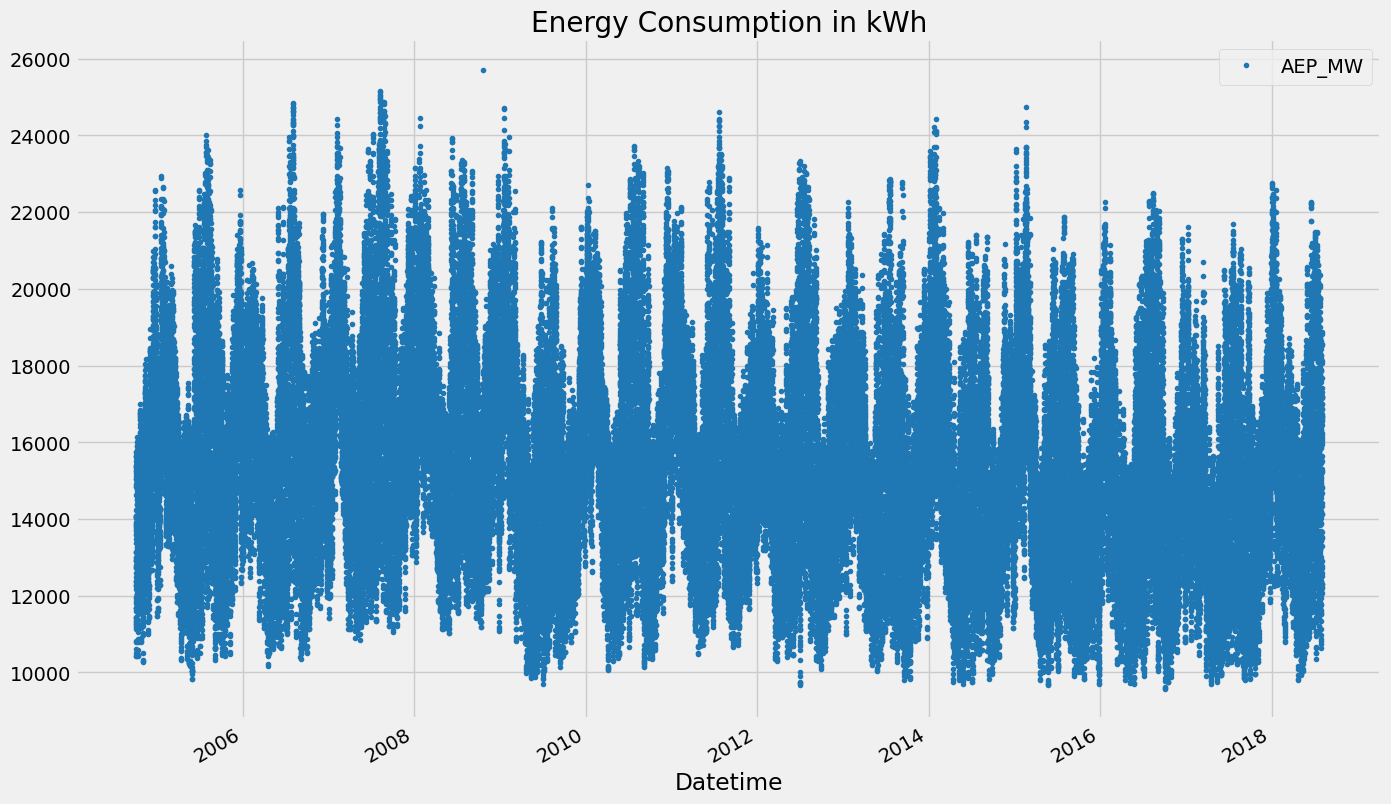

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
!pip3 install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

df = pd.read_csv("dataset/AEP_hourly.csv",
                 parse_dates=['Datetime'],index_col='Datetime').sort_values('Datetime')
print(df.head())


df.plot(style='.',
        figsize=(15, 10),
        color=color_pal[0],
        title='Energy Consumption in kWh',
       )


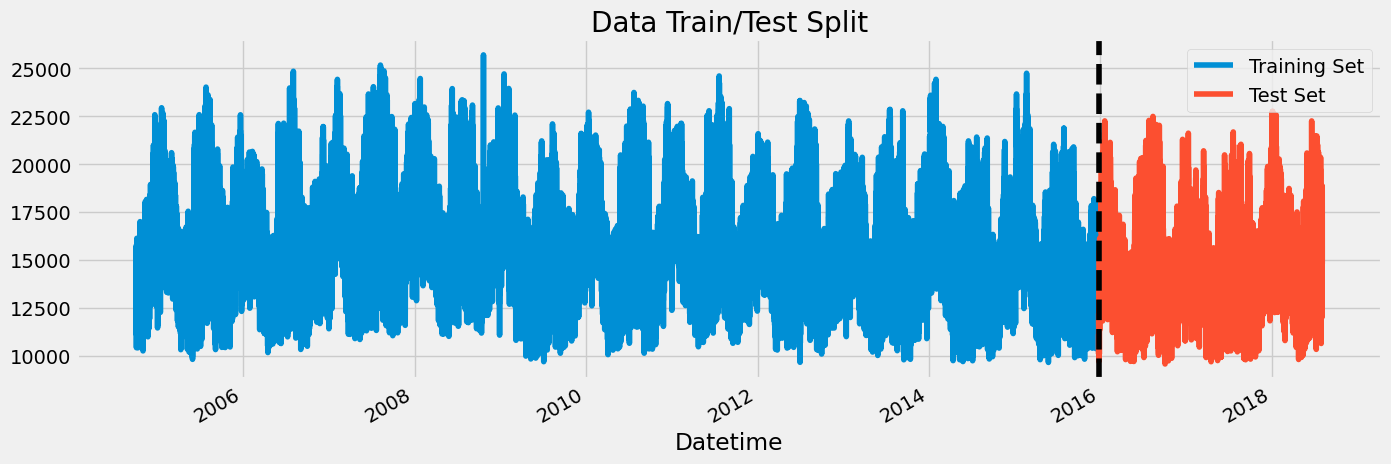

In [2]:
test = df.loc[df.index > '2015-12-24']
train = df.loc[df.index <= '2015-12-24']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2015-12-24', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

In [3]:
# Creazione della feature
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter

    return df


# Feature creation
df = create_features(df)

train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'month', 'quarter']
TARGET = 'AEP_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

score: 0.25631656458175833
score: 0.2520112103382227
score: 0.24968806608148142
score: 0.2568494169186454


Datetime
2015-12-24 01:00:00    13701.367931
2015-12-24 02:00:00    13853.378793
2015-12-24 03:00:00    14005.389654
2015-12-24 04:00:00    14157.400515
2015-12-24 05:00:00    14309.411377
                           ...     
2018-08-02 20:00:00    16826.740054
2018-08-02 21:00:00    16978.750915
2018-08-02 22:00:00    17130.761777
2018-08-02 23:00:00    17282.772638
2018-08-03 00:00:00    13501.580013
Name: prediction, Length: 22871, dtype: float64

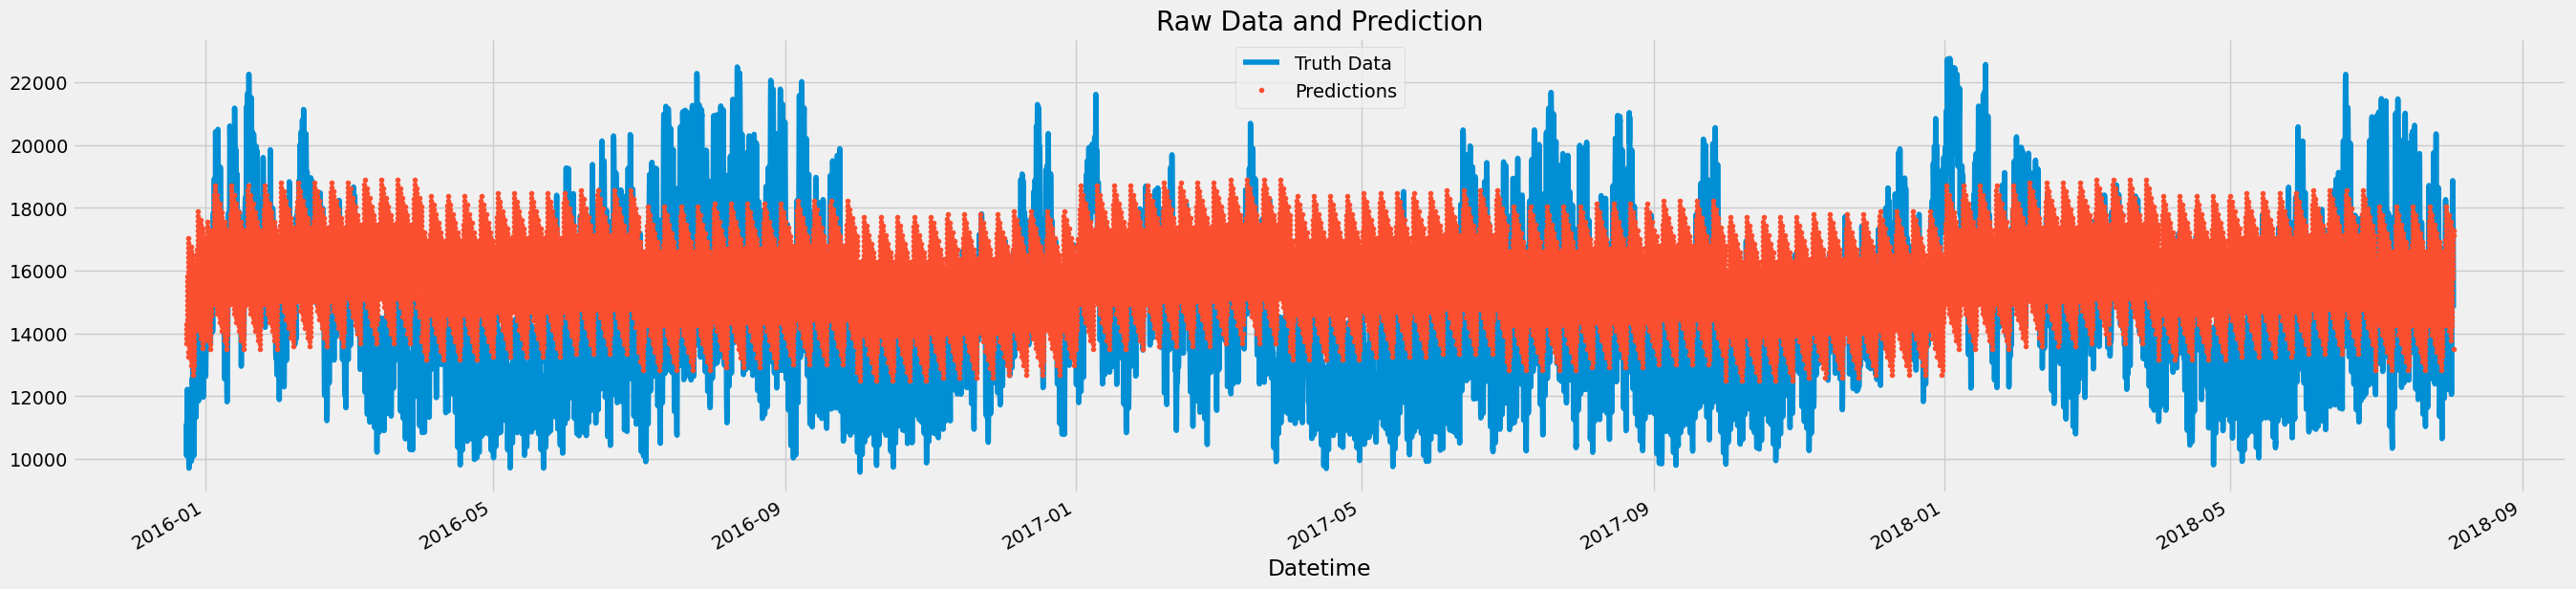

In [4]:
from sklearn.linear_model import SGDRegressor
import requests
import json

#r = requests.get(
#    "https://ipfs.moralis.io:2053/ipfs/Qmd2iDWBev1VDxmSfTJSGeS1BVh9hqnFnEXe6Dhr4mpDir/modello.json", headers={'Accept': 'application/json'})

#data = r.json()

for x in [0.0001, 0.0002, 0.0003, 0.0004]: 
    sgdr = SGDRegressor(loss='squared_error', penalty='l2', alpha=x, l1_ratio=0.15, fit_intercept=True, max_iter=10000, tol=None, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=50, warm_start=False, average=False)
    
    sgdr.fit(X_train, y_train)

    score = sgdr.score(X_train, y_train)
    print("score:", score)
    

#sgdr = SGDRegressor(loss=data["loss"], penalty=data["penalty"], alpha=data["alpha"], l1_ratio=data["l1_ratio"], fit_intercept=data["fit_intercept"], max_iter=data["max_iter"], tol=data["tol"], shuffle=data["shuffle"], verbose=data["Verbose"], epsilon=data["epsilon"],
#                    random_state= data["random_state"], learning_rate=data["learning_rate"], eta0=data["eta0"], power_t=data["power_t"], early_stopping=data["early_stopping"], validation_fraction=data["validation_fraction"], n_iter_no_change=data["n_iter_no_change"], warm_start=data["warm_start"], average=data["average"])

# Test del modello realizzato
test['prediction'] = sgdr.predict(X_test)
#df = df.merge(test[['prediction']], how='left',left_index=True, right_index=True)
reduced_df = df.loc[df.index > '2015-12-24']
ax = reduced_df[['AEP_MW']].plot(figsize=(30, 7))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
test['prediction']

In [17]:
!python -m pip install --upgrade setuptools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

ModuleNotFoundError: No module named 'distutils'